# Imports and Scaling Factors

In [1]:
'''
Author: Olivia McAuley
August 7, 2023
'''

%run ./McAuley_Imports.ipynb
%run ./McAuley_ScaleFactors.ipynb

A new version of galpy (1.10.0) is available, please upgrade using pip/conda/... to get the latest features and bug fixes!


# Underlying Milky Way Potential

In [2]:
mwp = MWPotential2014

# Set Up Growing Bar Potential

In [3]:
%run ./McAuley_DehnenBar.ipynb

/Users/oliviamcauley/miniconda3/envs/physics/lib/python3.8/site-packages/galpy/util/conversion.py:832: UserWarning: Returning output(s) in internal units even though use_physical=True, because ro and/or vo not set
  warnings.warn("Returning output(s) in internal units even though use_physical=True, because ro and/or vo not set")

this is v_c at CRo in natural units 1.01225452780562
This is omegabo in natural units 0.253063631951405
This is tsteady from bar potential: 24.82847993103223


# ICs Files
### Make sure inname is the correct initial conditions file

In [4]:
%run ./ICs_File.ipynb

# Time Calculator

In [5]:
%run ./Timescale_Calculator.ipynb

A single bar rotation:  24277.094552720897 Myr
It will rotate  0.20595545274752067  in  5.0 Gyr
     That is 0.041191090549504136 rotations per Gyr


After exactly  11  rotations the final time will be:
      7510.61517913725 natural units
      267.0480400799299 Gyr


Want max timestep to be 8.69 Myr
For dt=5.0 Myr there are approximately 53409.61 steps over full simulation,
   where one bar orbit every 4855.418910544179 time-steps.
Setting to 225 steps per one bar orbit, every step is 107.89819801209286 Myr
   and 11 rotations (0 to equelibrate, 1 to grow bar, 10 Tbar to evolve) takes 2475 time-steps
   For 5 iterations with 2Tbar each, there are 450 steps per iteration.


tfnat = 7510.61517913725 # Final integration time after 11 rotations in natural units
tfGyr = 267.0480400799299 Gyr # Final integration time after 11 rotations in Gyr
nttot = 2250         # Number of integration steps by final iteration
tfnatitr = 1365.5663962067729 # Integration time in natural units for this iter

# Find L4/5 Value

/Users/oliviamcauley/miniconda3/envs/physics/lib/python3.8/site-packages/galpy/potential/PowerSphericalPotentialwCutoff.py:96: RuntimeWarning: invalid value encountered in true_divide
  out= 2.*numpy.pi*self.rc**(3.-self.alpha)*(1/self.rc*special.gamma(1.-self.alpha/2.)*special.gammainc(1.-self.alpha/2.,(r/self.rc)**2.)-special.gamma(1.5-self.alpha/2.)*special.gammainc(1.5-self.alpha/2.,(r/self.rc)**2.)/r)

/Users/oliviamcauley/miniconda3/envs/physics/lib/python3.8/site-packages/galpy/potential/TwoPowerSphericalPotential.py:1374: RuntimeWarning: divide by zero encountered in true_divide
  out= -special.xlogy(1./r,1.+r/self.a) # stable as r -> infty



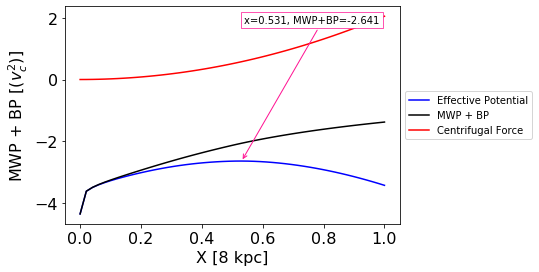

This is ymax at t=tsteady: 0.5306122448979591
This is L4/5 in natural units: 0.5306122448979591
This is L4/5 in physical units: 4.244897959183673 kpc


In [6]:
%run ./FindL5.ipynb

# Create Readme File

In [7]:
%run ./Create_ReadMe.ipynb

# Moving Plummer Potential with Single Particle Orbit at L4/5 (Oinplane)

In [8]:
%run ./MovePlummer.ipynb

/Users/oliviamcauley/miniconda3/envs/physics/lib/python3.8/site-packages/galpy/util/conversion.py:832: UserWarning: Returning output(s) in internal units even though use_physical=True, because ro and/or vo not set
  warnings.warn("Returning output(s) in internal units even though use_physical=True, because ro and/or vo not set")

This is v_circ: 1.0177299712794623
This is b_param in natural units: 0.00013375


In [9]:
pp.turn_physical_off()
moving_pp.turn_physical_off()

# Integrate Single Particle Orbit
### Check line 15 to make sure integration is over correct potentials (mwp OR mwp+bp)
Must create these Path Directory in this folder: orbits/PhD/Oinplane_MB/ AND orbits/PhD/Oinplane_M/

In [14]:
%run ./IntegrateSingleParticle.ipynb

This is shape of ts: (38694,)
Start time is:  2024-10-03 15:50:18.126510


   Saving orbits using cylindrical coordinates
   Shape of final orbits array is (6, 38694)
   There are 6 coordinates [R,phi,z,vR,vphi,vz]
   There is 1 orbit
   There are 38694 timestep outputs for each


   Saving orbits using cartesian coordinates
   Shape of final orbits array is (6, 38694)
   There are 6 coordinates [x,y,z,vx,vy,vz]
   There is 1 orbits
   There are 38694 timestep outputs for each


   TOTAL total time lapsed =  0:00:00.022405


# Set up cluster orbit from ICs that consist of processed orbits

In [11]:
%run ./ShiftClusterOrbit.ipynb

### Plot the Position of the Initial Condition, the initial position of the Shifted Cluster at t=0, and the initial velocity of the Shifted Cluster at t=0
Note: The Position of the Initial Condition and the initial position of the Shifted Cluster should be the same!

<ipython-input-12-3389aeb138cf>:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()



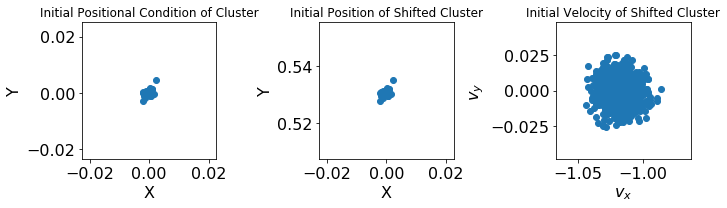

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10, 3), constrained_layout=True)
ax[0].scatter(o.x(),o.y())
ax[0].set_title('Initial Positional Condition of Cluster')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(shifted_cluster.x(ts[0]),shifted_cluster.y(ts[0]))
ax[1].set_title('Initial Position of Shifted Cluster')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

ax[2].scatter(shifted_cluster.vx(ts[0]),shifted_cluster.vy(ts[0]))
ax[2].set_title('Initial Velocity of Shifted Cluster')
ax[2].set_xlabel('$v_{x}$')
ax[2].set_ylabel('$v_{y}$')

plt.tight_layout()

plt.show()

# Integrate Cluster Orbit
Create the following Path Directories in this folder: orbits/PhD/__
where you enter 'M, MP, MB, or MBP' in the '__'

In [15]:
%run ./IntegrateClusterOrbit.ipynb

  0%|          | 0/1000 [00:00<?, ?it/s]

Start time is:  2024-10-03 15:50:40.581237




   Saving orbits using cylindrical coordinates
   Shape of final orbits array is (6, 1000, 450)
   There are 6 coordinates [R,phi,z,vR,vphi,vz]
   There are 1000 orbits
   There are 450 timestep outputs for each
   Time lapsed to save orbits =  0:00:00.282605


   Saving orbits using cartesian coordinates
   Shape of final orbits array is (6, 1000, 450)
   There are 6 coordinates [x,y,z,vx,vy,vz]
   There are 1000 orbits
   There are 450 timestep outputs for each
   Time lapsed to save orbits =  0:00:00.510418


   Making README file


   Total time lapsed =  0:00:00.008034
   TOTAL total time lapsed =  0:00:00.518726
